# Multi-Layer Perceptron

  다층 퍼셉트론(multi-layer perceptron, MLP)는 퍼셉트론으로 이루어진 층(layer) 여러 개를 순차적으로 붙여놓은 형태입니다. MLP는 정방향 인공신경망(feed-forward deep neural network, FFDNN)이라고 부르기도 합니다. 입력에 가까운 층을 아래에 있다고 하고, 출력에 가까운 층을 위에 있다고 이야기합니다. 신호는 아래에서 위로 계속 움직입니다. MLP에서는 인접한 층의 퍼셉트론간의 연결은 있어도 같은 층의 퍼셉트론끼리의 연결은 없습니다. 

  각 층은 그래프 구조에서 하나의 노드처럼 동작합니다. 즉, 입력이 들어오면 연산을 한 후 출력을 내보냅니다.
  
  MLP는 층의 갯수(depth)와 각 층의 크기(width)로 결정됩니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

from keras import models
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
bos = load_boston() # 데이터 불러오기

In [3]:
# bos 내에는 data, feature name 등 다양한 정보를 포함하고 있다.
df = pd.DataFrame(bos.data) # 데이터의 변수를 데이터프레임으로 만들기 
df.columns = bos.feature_names # 데이터 변수명 불러오기
df['Price'] = bos.target # 집 값에 해당하는 타겟 값 불러오기

# 데이터프레임 보여주기
# df.head()는 상위 5줄만 보여준다.
# df.head(10) 괄호 안에 숫자 10을 넣으면 10줄을 보여준다. 
df.head(10) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [ ]:
"""
** 데이터 변수 설명 **

CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
"""

'\n** 데이터 변수 설명 **\n\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율\n'

## 데이터 스케일링(MinMax Scale)

In [4]:
# 데이터를 넘파이 배열로 만들기
X = df.drop('Price', axis=1).to_numpy() # 데이터프레임에서 타겟값(Price)을 제외하고 넘파이 배열로 만들기
Y = df['Price'].to_numpy().reshape((-1,1)) # 데이터프레임 형태의 타겟값을 넘파이 배열로 만들기

# 데이터 스케일링
# sklearn에서 제공하는 MinMaxScaler 
# (X-min(X))/(max(X)-min(X))을 계산
scaler = MinMaxScaler() 
scaler.fit(X) 
X = scaler.transform(X)

scaler.fit(Y)
Y = scaler.transform(Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dense(30, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=0.001), loss='mse')
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [ ]:
history = model.fit(X_train, Y_train, epochs=400, batch_size=32, verbose=2)

Epoch 1/400
8/8 - 1s - loss: 0.0724
Epoch 2/400
8/8 - 0s - loss: 0.0510
Epoch 3/400
8/8 - 0s - loss: 0.0454
Epoch 4/400
8/8 - 0s - loss: 0.0363
Epoch 5/400
8/8 - 0s - loss: 0.0304
Epoch 6/400
8/8 - 0s - loss: 0.0279
Epoch 7/400
8/8 - 0s - loss: 0.0249
Epoch 8/400
8/8 - 0s - loss: 0.0218
Epoch 9/400
8/8 - 0s - loss: 0.0183
Epoch 10/400
8/8 - 0s - loss: 0.0201
Epoch 11/400
8/8 - 0s - loss: 0.0156
Epoch 12/400
8/8 - 0s - loss: 0.0158
Epoch 13/400
8/8 - 0s - loss: 0.0147
Epoch 14/400
8/8 - 0s - loss: 0.0130
Epoch 15/400
8/8 - 0s - loss: 0.0147
Epoch 16/400
8/8 - 0s - loss: 0.0124
Epoch 17/400
8/8 - 0s - loss: 0.0123
Epoch 18/400
8/8 - 0s - loss: 0.0132
Epoch 19/400
8/8 - 0s - loss: 0.0123
Epoch 20/400
8/8 - 0s - loss: 0.0115
Epoch 21/400
8/8 - 0s - loss: 0.0116
Epoch 22/400
8/8 - 0s - loss: 0.0101
Epoch 23/400
8/8 - 0s - loss: 0.0108
Epoch 24/400
8/8 - 0s - loss: 0.0095
Epoch 25/400
8/8 - 0s - loss: 0.0122
Epoch 26/400
8/8 - 0s - loss: 0.0080
Epoch 27/400
8/8 - 0s - loss: 0.0108
Epoch 28/4

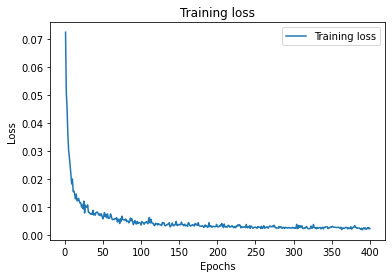

In [ ]:
loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 모델 평가

In [ ]:
test_mse_score = model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0113


In [ ]:
print(f"test_mse_score = {test_mse_score}")

test_mse_score = 0.011273016221821308


In [ ]:
print(f"test_rmse_score = {np.sqrt(test_mse_score)}")

test_rmse_score = 0.10617446125044058
